IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [2]:
df=pd.read_csv('happiness_score.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


EDA

In [3]:
df.shape

(158, 12)

we have 158 rows and 12 columns in dataset

In [4]:
df.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

showing that, which column belongs to which type of data

In [6]:
#checking Null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

no missing values

<AxesSubplot:>

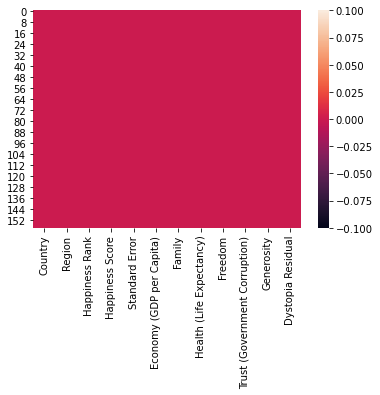

In [7]:
#showing missing values through heatmap
sns.heatmap(df.isnull())

no missing values

UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Happiness Score', ylabel='count'>

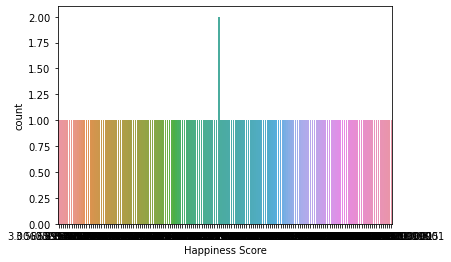

In [8]:
sns.countplot(df['Happiness Score'])

equally distributed

Bi VARIATE ANALYSIS

<AxesSubplot:title={'center':' comparison between happiness rank and family'}, xlabel='Happiness Rank', ylabel='Family'>

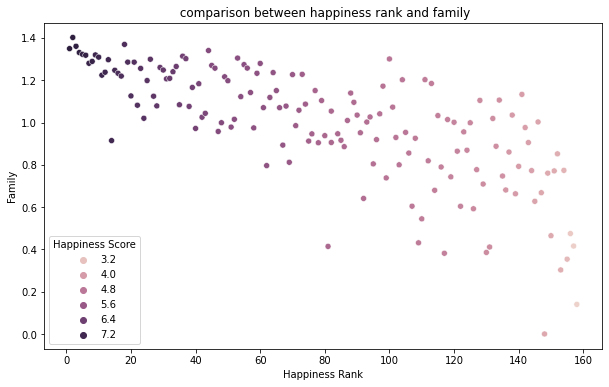

In [9]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness rank and family')
sns.scatterplot(df['Happiness Rank'], df['Family'],hue=df['Happiness Score'])

Family is increasing then Happiness Rank is decreasing

<AxesSubplot:title={'center':' comparison between happiness rank and family'}, xlabel='Happiness Score', ylabel='Family'>

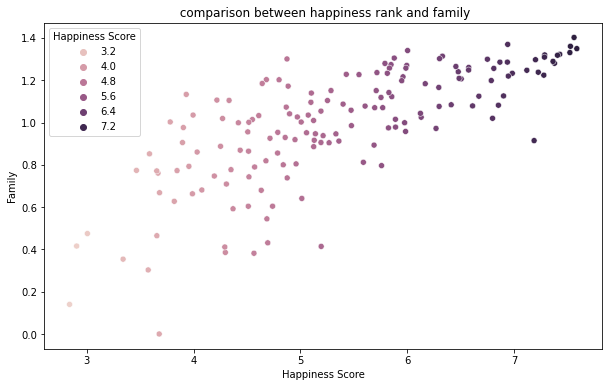

In [10]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness rank and family')
sns.scatterplot(df['Happiness Score'], df['Family'],hue=df['Happiness Score'])

Family is increasing then Happiness Score is increasing

 MULTIVARIATE ANALYSIS

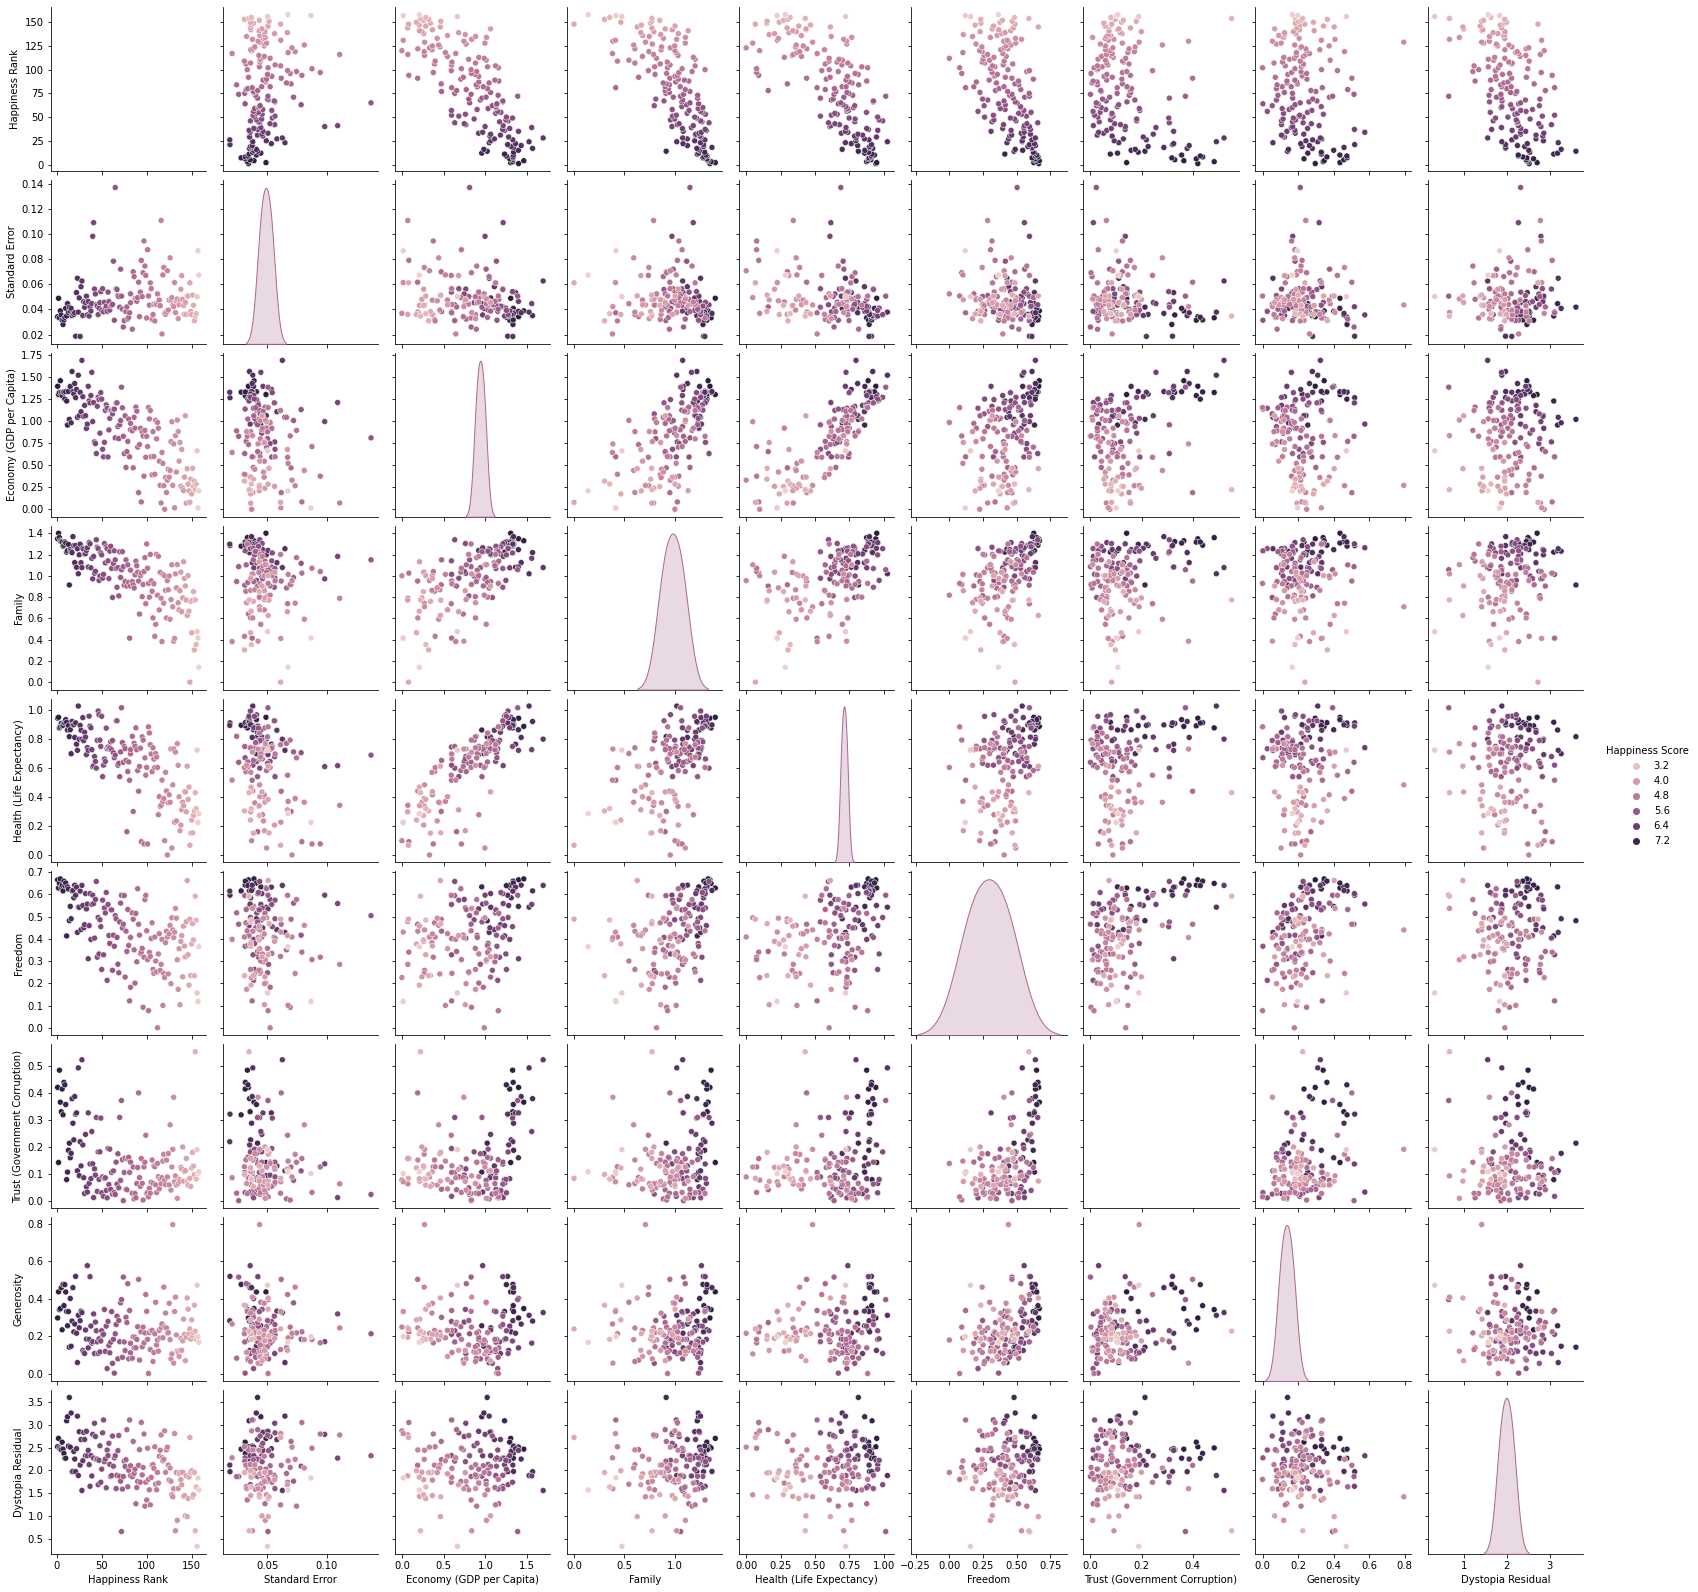

In [11]:
sns.pairplot(df, hue='Happiness Score')

In [12]:
#CORRELATION

cor=df.corr()

In [13]:
cor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Figure size 1800x1800 with 0 Axes>

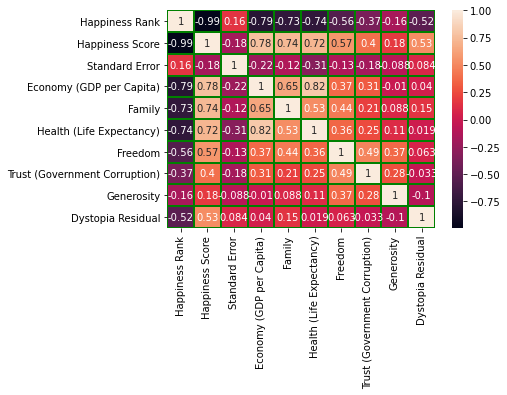

<Figure size 1800x1800 with 0 Axes>

In [14]:
sns.heatmap(cor,annot=True, linewidths=1, linecolor='green')
plt.figure(figsize=(25,25))

light shades indicates positive correlation and dark shades indicates negative correlation
like Fmaily is positively correlated with Happiness Score
and Standard error is negatively correlated with Happiness Score

FOUND THE PROBLEM

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Country']=LE.fit_transform(df['Country'])

In [16]:
df['Region']=LE.fit_transform(df['Region'])

In [17]:
df['Country'].unique()

array([135,  58,  37, 105,  24,  45,  99, 134, 100,   6,  64,  33,   7,
        91, 150,  18,  82,  63,  12, 148, 149, 106, 153, 123, 109,  49,
        27, 115,  46,   4,  36, 151,  29, 140, 119, 129,  88, 137,  73,
       132, 142,  42,  52, 152, 124,  68, 128,  40,   9,  65,  15,  92,
       110,  70, 125,  81, 101, 111,  11, 113,  86,  34,  80, 117,  67,
       104,  35,   2,  72, 145,  90,  56,  43,  60, 154, 144,  74, 103,
        14,   8, 107,  69,  94,  28, 156, 116, 121, 114,  76, 112, 126,
        95,  83,  96,   1,  16,  78,  39,  75,  93, 133,  51,  77,  57,
        55, 138, 143, 108,  10,  61, 147,  62, 127,  50, 157,  79,  59,
       131,  54,  32,  98,  44, 122,  89,  71,  38,   5,  17,  97,  48,
        85, 130,  23,  19,  41, 155,   3,  87,  31,  30, 146, 120,  47,
       102,  22, 139,  84,  25,  26,  53,  66,  20,   0, 118,  13, 136,
        21, 141])

In [18]:
df['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

In [19]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


OUTLIER REMOVAL


Country                             AxesSubplot(0.125,0.536818;0.110714x0.343182)
Region                           AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Happiness Rank                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Family                                 AxesSubplot(0.125,0.125;0.110714x0.343182)
Health (Life Expectancy)            AxesSubplot(0.257857,0.125;0.110714x0.343182)
Freedom                             AxesSubplot(0.390714,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.656429,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

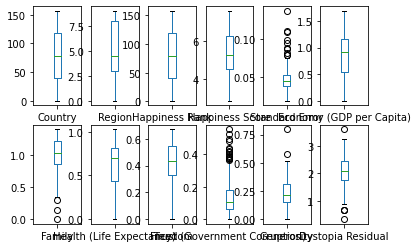

In [20]:
df.plot(kind='box', subplots=True, layout=(2,6))

In [21]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Outliers are present in standard error, Family ,Trust , Generosity and Dystopia Residual

In [22]:
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)]

In [23]:
new_df.shape

(149, 12)

9 rows has been removed as a outlier

In [24]:
df.shape

(158, 12)

In [25]:
(1/158) #checking percentage of data loss

0.006329113924050633

SKEWNESS

In [26]:
new_df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

data is not between  in range +5 and -5 are skewed 

but in this datasets , data is not much skewed

TRAIN TEST SPLIT

In [27]:
x=df.drop(['Happiness Score'], axis=1)
y=df['Happiness Score']

In [28]:
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=42, test_size=0.1)

In [29]:
x_train.shape

(142, 11)

In [30]:
y_train.shape

(142,)

In [31]:
x_test.shape

(16, 11)

In [32]:
y_test.shape

(16,)

MODEL BUILDING

In [33]:
lm=LinearRegression()

In [34]:
lm.fit(x_train, y_train)

LinearRegression()

In [35]:
lm.coef_

array([-6.60264305e-07, -1.83072231e-05, -1.85498821e-06, -1.37597386e-03,
        1.00005320e+00,  9.99890778e-01,  9.99694820e-01,  9.99722032e-01,
        9.99949163e-01,  1.00011407e+00,  9.99951076e-01])

In [36]:
lm.intercept_

0.0008004302615907122

In [37]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [38]:
lm.score(x_train, y_train)

0.9999999438613912

99% score ,we are getting

In [39]:
#predict the value

pred=lm.predict(x_test)
print('predicted score:', pred)
print('actual score:', y_test)

predicted score: [4.3070365  5.98711485 4.1942852  2.90455156 5.05721378 6.57410821
 4.89747284 4.87602363 4.94877242 3.93073327 6.90134932 5.82830324
 6.98264457 5.54821151 6.78623528 6.50514758]
actual score: 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
Name: Happiness Score, dtype: float64


In [40]:
print('error:')

print('mean absolute error', mean_absolute_error(y_test,pred))
print('mean squared error', mean_squared_error(y_test,pred))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 0.0002409029157482423
mean squared error 7.612201231753477e-08
root mean squared error 0.00027590217889232913


FINAL MODEL

In [41]:
lm.score(x_train, y_train)*100

99.99999438613912

Basis on above analysis & Prediction. The happiness score is predicted as 99.99%